# DSCI 552 HW7
## Haoyiwen Guo 
## Github Username: HaoyiwenGuo
## USC ID: 3946861304 
## I use 1 late day.

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, cv
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
X = df.iloc[:,:-4]
labels = ["Family", "Genus", "Species"]
y = df.loc[:,labels]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 50)
y_train

,Family,Genus,Species
3995,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1197,Dendrobatidae,Ameerega,Ameeregatrivittata
2507,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5549,Hylidae,Hypsiboas,HypsiboasCordobae
2764,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2014,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
6253,Hylidae,Hypsiboas,HypsiboasCordobae
1931,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5600,Hylidae,Hypsiboas,HypsiboasCordobae


## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:
## i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.
### Exact match (also called Subset accuracy): is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.
### Hamming-Loss is the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels.
## ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [5]:
params = {'C': np.logspace(-5, 6, 10), 'gamma': np.logspace(-5, 5, 10)}

for label in labels:
    svc = SVC(kernel="rbf")
    grid = GridSearchCV(svc, param_grid = params, cv = 10, scoring = 'accuracy')
    grid.fit(X_train, y_train[label])
    y_pred = grid.predict(X_test)
    y_test_label = y_test[label]
    optimal_params = grid.best_params_
    optimal_score = grid.best_score_
    accuracy = accuracy_score(y_test_label,y_pred)
    hamming = hamming_loss(y_test_label, y_pred)
    print("For ", label, "label")
    print("Best parameters: ", optimal_params)
    print("Best score:", optimal_score)
    print("Accuracy score:", accuracy)
    print("Hamming loss:", hamming)

For  Family label
Best parameters:  {'C': 215.44346900318865, 'gamma': 3.593813663804626}
Best score: 0.9930480608413014
Accuracy score: 0.9921259842519685
Hamming loss: 0.007874015748031496
For  Genus label
Best parameters:  {'C': 12.915496650148853, 'gamma': 3.593813663804626}
Best score: 0.9890770456625327
Accuracy score: 0.9888837424733673
Hamming loss: 0.0111162575266327
For  Species label
Best parameters:  {'C': 12.915496650148853, 'gamma': 3.593813663804626}
Best score: 0.98887942188141
Accuracy score: 0.9884205650764243
Hamming loss: 0.01157943492357573


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [7]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
params = {'C': np.logspace(-5, 6, 10)}

for label in labels:
    svc_linear = LinearSVC(penalty= 'l1', dual=False)
    grid = GridSearchCV(svc_linear, param_grid = params, cv = 10, scoring = 'accuracy')
    grid.fit(X_train_scale, y_train[label])
    y_pred = grid.predict(X_test_scale)
    y_test_label = y_test[label]
    optimal_params = grid.best_params_
    optimal_score = grid.best_score_
    accuracy = accuracy_score(y_test_label,y_pred)
    hamming = hamming_loss(y_test_label, y_pred)
    print("For ", label, "label")
    print("Best parameters: ", optimal_params)
    print("Best score:", optimal_score)
    print("Accuracy score:", accuracy)
    print("Hamming loss:", hamming)

For  Family label
Best parameters:  {'C': 12.915496650148853}
Best score: 0.9376569945406924
Accuracy score: 0.9333024548402038
Hamming loss: 0.0666975451597962
For  Genus label
Best parameters:  {'C': 215.44346900318865}
Best score: 0.9489716463126004
Accuracy score: 0.9490504863362668
Hamming loss: 0.05094951366373321
For  Species label
Best parameters:  {'C': 0.7742636826811278}
Best score: 0.9588974091956199
Accuracy score: 0.9559981472904122
Hamming loss: 0.04400185270958777


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [13]:
params = {'C': np.logspace(-5, 6, 10)}

for label in labels:
    sm = SMOTE()
    X_train_sm, y_train_sm = sm.fit_resample(X_train_scale, y_train[label])
    X_test_sm, y_test_sm = sm.fit_resample(X_test_scale, y_test[label])
    svc_linear = LinearSVC(penalty= 'l1', dual = False)
    grid = GridSearchCV(svc_linear, param_grid = params, cv = 10, scoring = 'accuracy')
    grid.fit(X_train_sm, y_train_sm)
    y_pred = grid.predict(X_test_sm)
    optimal_params = grid.best_params_
    optimal_score = grid.best_score_
    accuracy = accuracy_score(y_test_sm,y_pred)
    hamming = hamming_loss(y_test_sm, y_pred)
    print("For ", label, "label")
    print("Best parameters: ", optimal_params)
    print("Best score:", optimal_score)
    print("Accuracy score:", accuracy)
    print("Hamming loss:", hamming)

For  Family label
Best parameters:  {'C': 12.915496650148853}
Best score: 0.9507065675570086
Accuracy score: 0.940814757878555
Hamming loss: 0.05918524212144504
For  Genus label
Best parameters:  {'C': 215.44346900318865}
Best score: 0.9604590169459734
Accuracy score: 0.9425345809601302
Hamming loss: 0.05746541903986981
For  Species label
Best parameters:  {'C': 215.44346900318865}
Best score: 0.9642243143675808
Accuracy score: 0.9510144927536232
Hamming loss: 0.04898550724637681


### From the results, we can see that non-linear SVM model using Gaussian kernels  has the best accuracy score and hamming loss, so performs best among all three models. C is the weight of the SVM penalty and gamma is the width of the Gaussian Kernel. Using SMOTE to remedy class imbalance does not improve the model. Since non-linear SVM fits better than L1-penalized SVM, the data might not be linear-separable.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.
### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [26]:
def optimal_k(X, i):
    best_k = 0
    max_score = -1
    for k in range(2, 51):
        kmeans = KMeans(n_clusters = k, random_state= i).fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        if score > max_score:
            max_score = score
            best_k = k
    return best_k


def hamming_report(k_val, X, y, i):
    for k in range(k_val):
        majority = {}
        non = 0
        majority_label = {}
        kmeans = KMeans(n_clusters = k_val, random_state= i).fit(X)
        label_k = kmeans.labels_
        y_label = y.copy()
        y_label['label'] = label_k
        y_cluster = y_label[y_label['label'] == k]
        for j in ["Family", "Genus", "Species"]:
            majority_label[j] = y_cluster[j].value_counts().idxmax()
            majority[k] = majority_label
            non += sum(y_cluster[j] != majority[k][j])
    hamming_dist = non / y_label.shape[0]
    hamming_losses = non / (y_label.shape[0] * y_label.shape[1])
    return majority, hamming_dist, hamming_losses

### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [27]:
loss_list = []
dist_list= []
for i in range(1, 51):
    print("Monte Carlo Simulation", i)
    best_k = optimal_k(X, i)
    print("Optimal K :", best_k)
    majority_l, hamming_loss, hamming_dist = hamming_report(best_k, X, y, i)
    print('Majority labels:', majority_l)
    print("Hamming loss:", hamming_loss)
    print("Hamming distance:", hamming_dist)
    print()
    loss_list.append(hamming_loss)
    dist_list.append(hamming_dist)

Monte Carlo Simulation 1
Optimal K : 4
Majority labels: {3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}
Hamming loss: 0.3676164002779708
Hamming distance: 0.0919041000694927

Monte Carlo Simulation 2
Optimal K : 4
Majority labels: {3: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre'}}
Hamming loss: 0.11369006254343295
Hamming distance: 0.028422515635858236

Monte Carlo Simulation 3
Optimal K : 4
Majority labels: {3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
Hamming loss: 0.22140375260597636
Hamming distance: 0.05535093815149409

Monte Carlo Simulation 4
Optimal K : 4
Majority labels: {3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
Hamming loss: 0.22140375260597636
Hamming distance: 0.05535093815149409

Monte Carlo Simulation 5
Optimal K : 4
Majority labels: {3: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactyl

In [32]:
mean_dist = np.mean(dist_list)
std_dist = np.std(dist_list)
mean_loss = np.mean(loss_list)
std_loss = np.std(loss_list)
mean_score = np.mean(1 - np.array(loss_list))
std_score = np.std(1 - np.array(loss_list))
print("Average Hamming distance:",mean_dist)
print("Standard deviation of Hamming distance:",std_dist)
print("Average Hamming loss:",mean_loss)
print("Standard deviation of Hamming loss:",std_loss)
print("Average Hamming score:",mean_score)
print("Standard deviation of Hamming score:",std_score)

Average Hamming distance: 0.04611118832522585
Standard deviation of Hamming distance: 0.029949457977450033
Average Hamming loss: 0.1844447533009034
Standard deviation of Hamming loss: 0.11979783190980013
Average Hamming score: 0.8155552466990966
Standard deviation of Hamming score: 0.11979783190980015


## ISLR 12.6.2

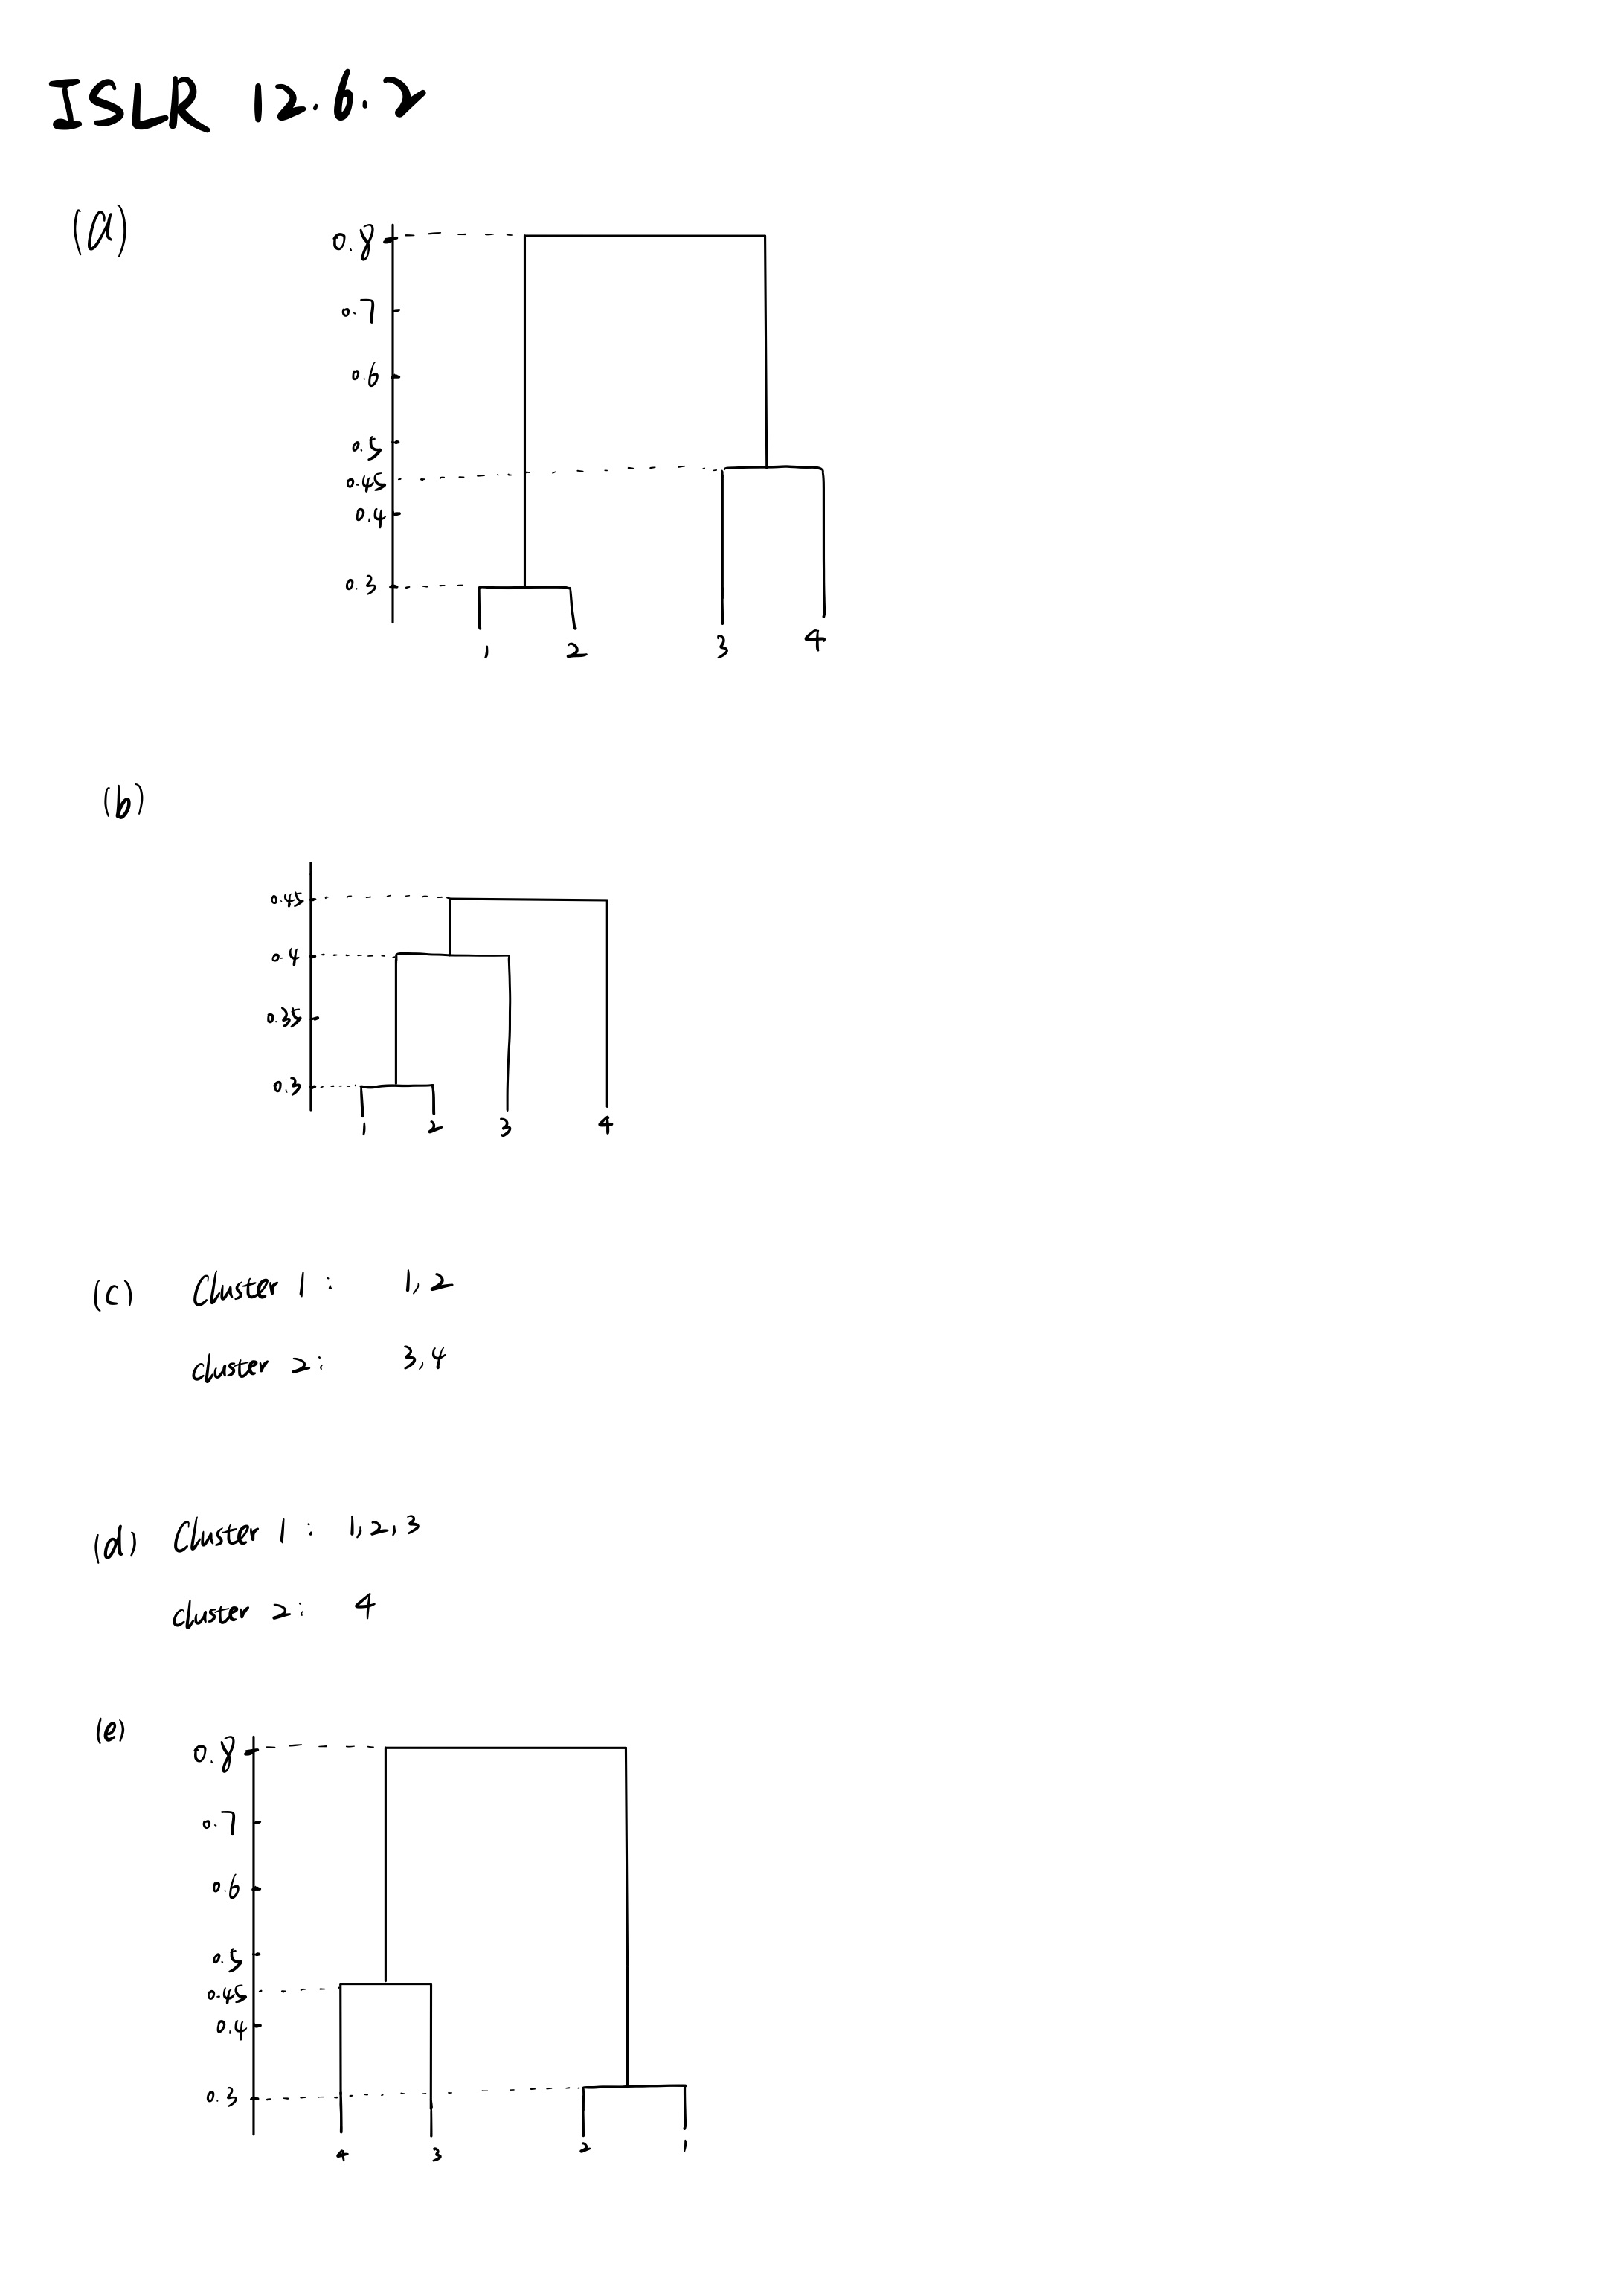

In [33]:
from IPython.display import Image
PATH = "/Users/haoyiwen/Downloads/"
Image(filename = PATH + "hw7.jpg")